# **Tinjauan Proyek Prediksi Obesitas**

#### **Deskripsi Proyek:**
Proyek ini bertujuan untuk memprediksi tingkat obesitas pada individu dari Meksiko, Peru, dan Kolombia menggunakan data yang dikumpulkan berdasarkan kebiasaan makan dan kondisi fisik mereka. Dataset mencakup data dari survei online, dengan respons dari individu mengenai berbagai kebiasaan gaya hidup dan diet.

#### **Tinjauan Dataset**
Dataset terdiri dari 2111 catatan dengan 17 atribut, dikategorikan menjadi tujuh tingkat obesitas: Berat Badan Kurang, Berat Badan Normal, Kelebihan Berat Badan Tingkat I, Kelebihan Berat Badan Tingkat II, Obesitas Tipe I, Obesitas Tipe II, dan Obesitas Tipe III. Rekaman menggabungkan respons survei aktual dan data yang dihasilkan secara sintetis menggunakan SMOTE untuk keseimbangan.

#### **Atribut**
- **Demografi**: Jenis Kelamin, Umur, Tinggi, Berat
- **Kebiasaan Diet**: Riwayat keluarga kelebihan berat badan, konsumsi makanan berkalori tinggi yang sering (FAVC), frekuensi konsumsi sayuran (FCVC), jumlah makanan utama (NCP), ngemil (CAEC), konsumsi alkohol (CALC)
- **Gaya Hidup**: Merokok (SMOKE), konsumsi air harian (CH2O), pemantauan asupan kalori (SCC)
- **Aktivitas Fisik**: Frekuensi aktivitas fisik (FAF), waktu yang dihabiskan menggunakan teknologi (TUE)
- **Transportasi**: Moda transportasi (MTRANS)

#### **Tujuan**
Tujuan utama adalah menggunakan dataset ini untuk mengembangkan model prediktif yang dapat secara akurat mengklasifikasikan individu ke dalam tingkat obesitas yang benar berdasarkan data masukan mereka. Model ini berpotensi untuk diintegrasikan ke dalam aplikasi kesehatan untuk memberikan umpan balik kepada pengguna tentang pilihan gaya hidup mereka dan menyarankan modifikasi untuk mengurangi risiko obesitas.

#### **Implementasi di Google Colab**
Proyek ini akan diimplementasikan dalam notebook Google Colab untuk memanfaatkan sumber daya komputasinya dan kemudahan berbagi. Notebook akan mencakup:
- Eksplorasi data dan visualisasi untuk memahami distribusi dan korelasi berbagai fitur.
- Langkah pra-pemrosesan termasuk pembersihan data dan transformasi.
- Pembangunan model, evaluasi, dan perbandingan berbagai algoritma pembelajaran mesin.
- Diskusi hasil model dan implikasi potensial untuk informatika kesehatan.

Pendekatan komprehensif ini akan memfasilitasi pemahaman faktor-faktor yang berkontribusi terhadap obesitas dan mendukung pengembangan intervensi yang ditargetkan.


# **1. Explorary Data Analysis**

In [136]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/Obesity prediction.csv')
df.head(10)

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [138]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### **1.1 Visualisasi Distribusi Target**

<ipython-input-160-f117fce003f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Obesity"], order=df["Obesity"].value_counts().index, palette="viridis")


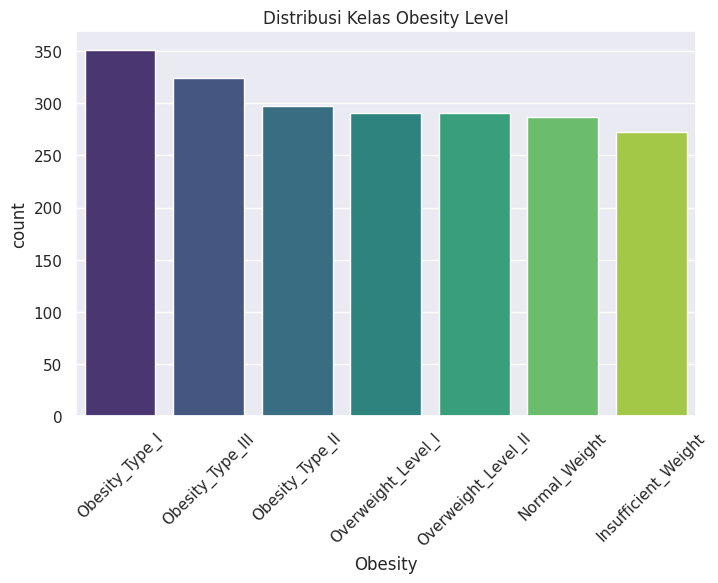

In [160]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Obesity"], order=df["Obesity"].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribusi Kelas Obesity Level")
plt.show()

### **1.2 Distribusi Umur Relatif terhadap Tingkat Obesitas**

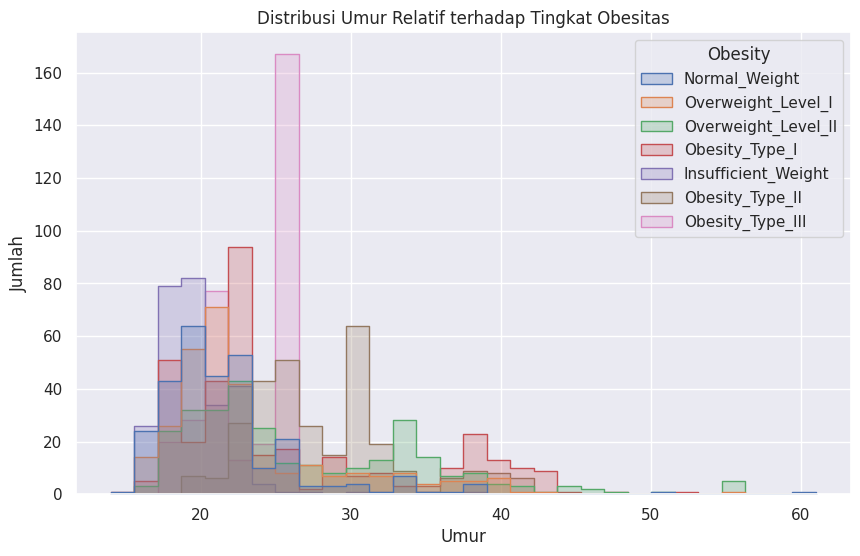

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Obesity', element='step', bins=30)
plt.title('Distribusi Umur Relatif terhadap Tingkat Obesitas')
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.show()

Grafik ini menunjukkan distribusi umur relatif terhadap berbagai tingkat obesitas. Kita dapat melihat bahwa usia 20-an memiliki proporsi yang tinggi untuk hampir semua kategori obesitas, khususnya Overweight dan Obesity Type I. Hal ini menunjukkan bahwa usia muda cenderung memiliki variasi yang lebih besar dalam tingkat obesitas.


### **1.3 Hubungan antara Tinggi dan Berat Badan dengan Tingkat Obesitas**

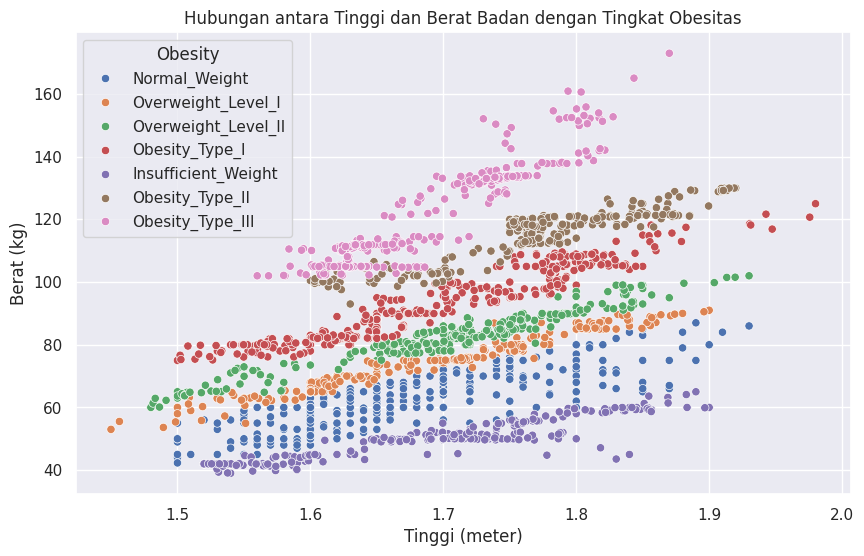

In [141]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Height', y='Weight', hue='Obesity')
plt.title('Hubungan antara Tinggi dan Berat Badan dengan Tingkat Obesitas')
plt.xlabel('Tinggi (meter)')
plt.ylabel('Berat (kg)')
plt.show()

Visualisasi ini mengeksplorasi hubungan antara tinggi dan berat badan, dengan setiap titik mewakili individu yang dikategorikan berdasarkan tingkat obesitasnya. Pola yang jelas adalah bahwa semakin tinggi berat badan relatif terhadap tinggi, semakin tinggi tingkat obesitasnya. Ini menunjukkan hubungan positif yang kuat antara berat badan yang lebih tinggi dan tingkat obesitas yang lebih tinggi.


### **1.4 Analisis Pengaruh Pola Makan terhadap Tingkat Obesitas**


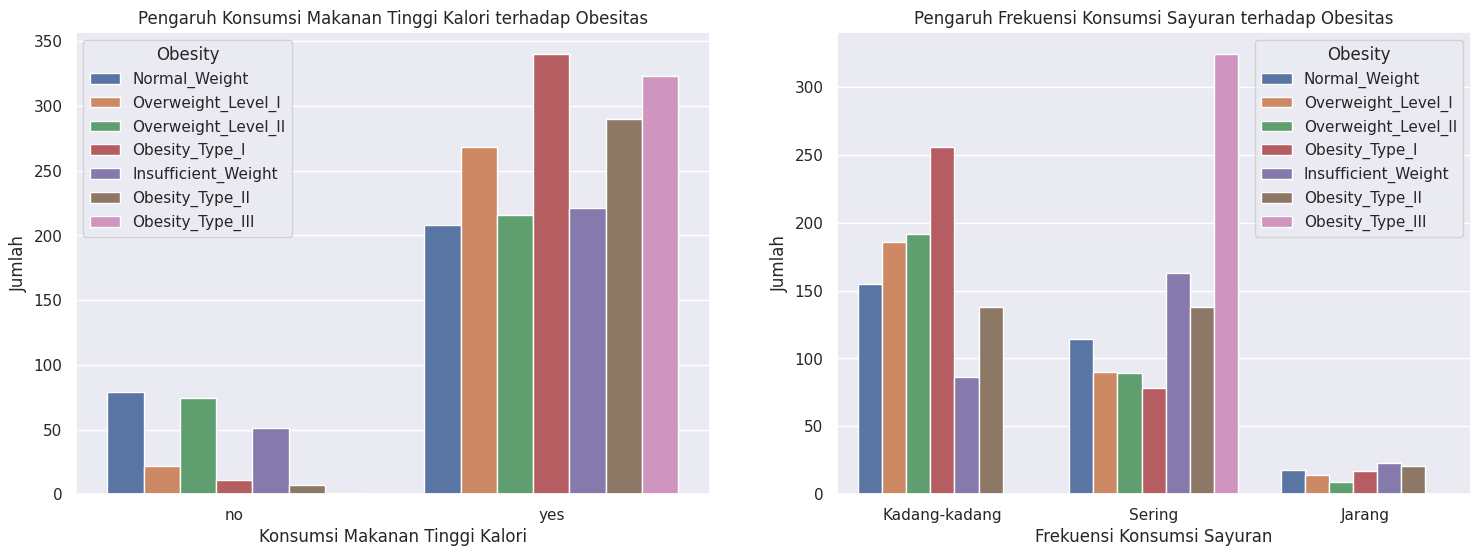

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Mengelompokkan FCVC menjadi kategori
def categorize_fcvc(x):
    if x < 1.5:
        return "Jarang"
    elif 1.5 <= x < 2.5:
        return "Kadang-kadang"
    else:
        return "Sering"

df['FCVC_Category'] = df['FCVC'].apply(categorize_fcvc)
sns.countplot(ax=axes[1], data=df, x='FCVC_Category', hue='Obesity')
axes[1].set_title('Pengaruh Frekuensi Konsumsi Sayuran terhadap Obesitas')
axes[1].set_xlabel('Frekuensi Konsumsi Sayuran')
axes[1].set_ylabel('Jumlah')

sns.countplot(ax=axes[0], data=df, x='FAVC', hue='Obesity')
axes[0].set_title('Pengaruh Konsumsi Makanan Tinggi Kalori terhadap Obesitas')
axes[0].set_xlabel('Konsumsi Makanan Tinggi Kalori')
axes[0].set_ylabel('Jumlah')

plt.show()


Grafik di atas menunjukkan hubungan antara konsumsi makanan tinggi kalori dengan tingkat obesitas. Beberapa temuan utama:
- **Individu yang sering mengonsumsi makanan tinggi kalori lebih cenderung memiliki obesitas tingkat tinggi (Obesity Type I, II, dan III).**
- **Sebaliknya, individu yang tidak mengonsumsi makanan tinggi kalori lebih banyak berada dalam kategori berat badan normal atau kelebihan berat badan ringan (Overweight Level I & II).**
- Hal ini menunjukkan bahwa **konsumsi makanan tinggi kalori berkontribusi terhadap risiko obesitas**, yang selaras dengan literatur mengenai pola makan tinggi kalori dan peningkatan berat badan.

---

#### **2. Pengaruh Frekuensi Konsumsi Sayuran terhadap Obesitas**

Grafik ini menggambarkan hubungan antara frekuensi konsumsi sayuran dengan tingkat obesitas. Temuan menarik dari grafik ini:
- **Kategori "Sering" justru memiliki jumlah individu dengan Obesity Type III yang paling tinggi.**
- **Kategori "Kadang-kadang" memiliki distribusi obesitas yang lebih merata, dengan lebih banyak individu dalam kategori Normal Weight dan Overweight.**
- **Kategori "Jarang" memiliki jumlah yang relatif kecil di semua kategori obesitas**, kemungkinan karena sebagian besar individu dalam dataset memang mengonsumsi sayuran secara rutin.

**Interpretasi:**
- Konsumsi sayuran **tidak langsung berkorelasi dengan penurunan obesitas**.
- Bisa jadi individu dengan obesitas tinggi yang sering makan sayur juga memiliki pola makan yang tidak sehat secara keseluruhan (misalnya, tetap mengonsumsi makanan tinggi kalori dalam jumlah besar).
- Faktor lain seperti **jumlah total kalori harian, keseimbangan diet, dan aktivitas fisik** mungkin memiliki pengaruh lebih besar terhadap obesitas dibanding hanya frekuensi konsumsi sayuran.

---

### **Kesimpulan Sementara**
1. **Makanan tinggi kalori berkontribusi signifikan terhadap obesitas**, seperti yang terlihat dari dominasi Obesity Type I, II, dan III pada individu yang sering mengonsumsinya.
2. **Konsumsi sayuran yang tinggi tidak berarti individu memiliki berat badan yang lebih sehat**, karena ada kemungkinan faktor lain yang mempengaruhi obesitas (misalnya pola makan keseluruhan dan tingkat aktivitas fisik).
3. **Analisis tambahan diperlukan** untuk melihat hubungan antara konsumsi sayuran, makanan tinggi kalori, dan faktor lain seperti aktivitas fisik terhadap tingkat obesitas.


### **1.5 Hubungan Frekuensi Aktivitas Fisik dengan Tingkat Obesitas**

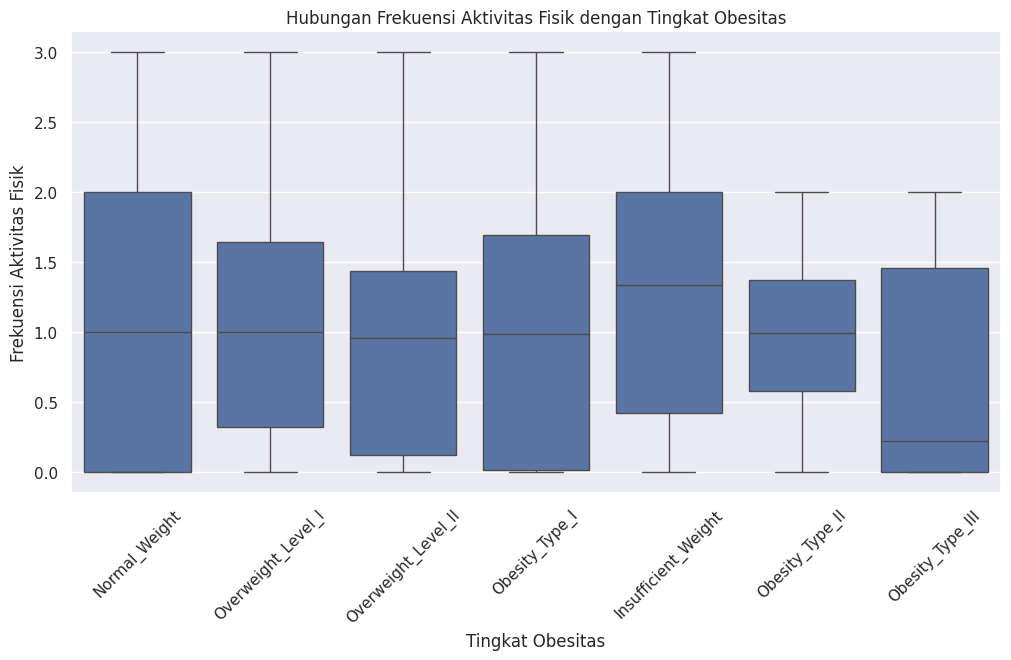

In [143]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Obesity', y='FAF')
plt.title('Hubungan Frekuensi Aktivitas Fisik dengan Tingkat Obesitas')
plt.xlabel('Tingkat Obesitas')
plt.ylabel('Frekuensi Aktivitas Fisik')
plt.xticks(rotation=45)
plt.show()

Box plot ini mengilustrasikan hubungan antara frekuensi aktivitas fisik dan tingkat obesitas. Data menunjukkan variasi yang signifikan dalam frekuensi aktivitas fisik di semua kategori obesitas, tetapi secara umum, individu dengan obesitas tipe yang lebih tinggi memiliki frekuensi aktivitas fisik yang lebih rendah.


### **1.6 Pengaruh Jenis Transportasi terhadap Tingkat Obesitas**

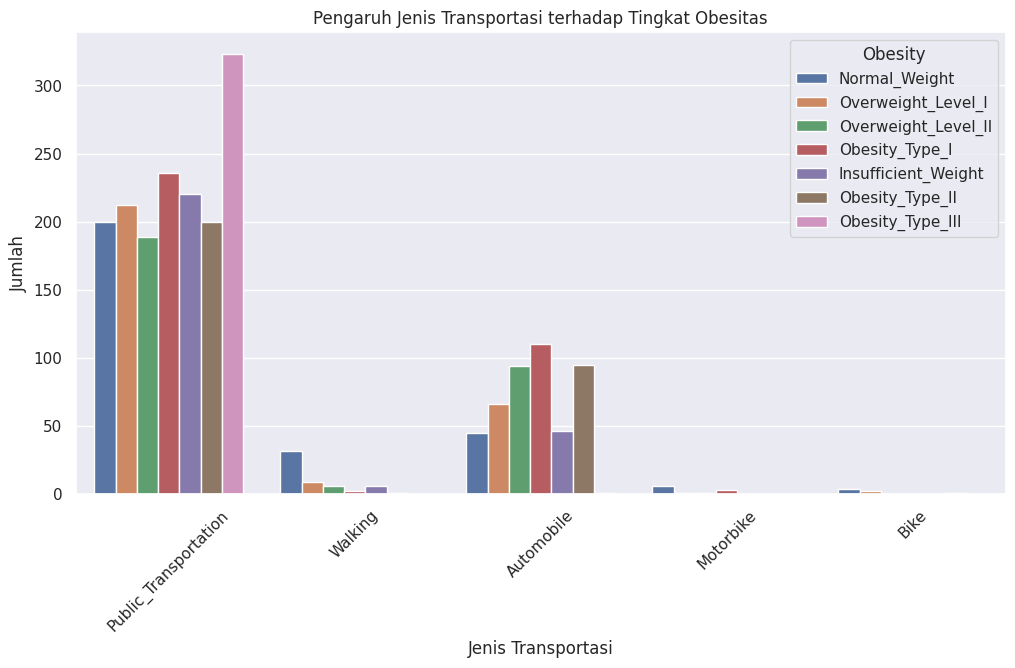

In [144]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='MTRANS', hue='Obesity')
plt.title('Pengaruh Jenis Transportasi terhadap Tingkat Obesitas')
plt.xlabel('Jenis Transportasi')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

Visualisasi ini mengevaluasi pengaruh jenis transportasi terhadap tingkat obesitas. Penggunaan transportasi umum cenderung dikaitkan dengan tingkat obesitas yang lebih rendah dibandingkan dengan penggunaan mobil atau motor. Ini mungkin menunjukkan bahwa penggunaan transportasi umum, yang seringkali melibatkan lebih banyak aktivitas fisik seperti berjalan ke stasiun atau halte, bisa menjadi faktor protektif terhadap obesitas.

# **2. Preprocessing Data**

### **2.1 Cek Data Duplikat**

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
 17  FCVC_Category   2111 non-null   o

In [146]:
df.duplicated().sum()

24

In [147]:
# Hapus duplikat
df_cleaned = df.drop_duplicates()

# Cek kembali apakah masih ada duplikat
print("Jumlah data setelah menghapus duplikat:", df_cleaned.shape[0])

Jumlah data setelah menghapus duplikat: 2087


In [148]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2087 non-null   object 
 1   Age             2087 non-null   float64
 2   Height          2087 non-null   float64
 3   Weight          2087 non-null   float64
 4   family_history  2087 non-null   object 
 5   FAVC            2087 non-null   object 
 6   FCVC            2087 non-null   float64
 7   NCP             2087 non-null   float64
 8   CAEC            2087 non-null   object 
 9   SMOKE           2087 non-null   object 
 10  CH2O            2087 non-null   float64
 11  SCC             2087 non-null   object 
 12  FAF             2087 non-null   float64
 13  TUE             2087 non-null   float64
 14  CALC            2087 non-null   object 
 15  MTRANS          2087 non-null   object 
 16  Obesity         2087 non-null   object 
 17  FCVC_Category   2087 non-null   object

### **2.2 Cek Outlier**

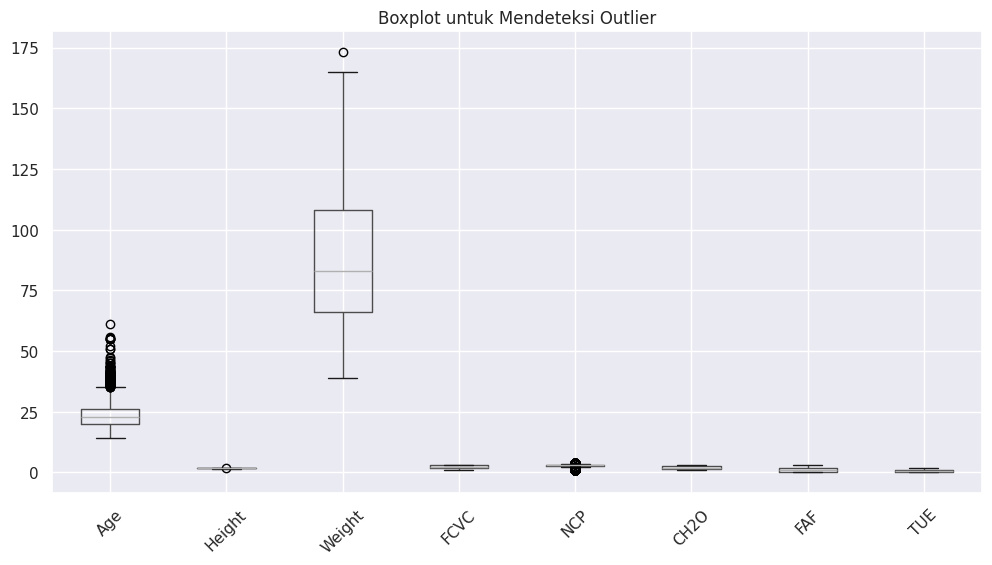

Jumlah outlier per fitur:
 Age       167
Height      1
Weight      1
FCVC        0
NCP       577
CH2O        0
FAF         0
TUE         0
dtype: int64


In [149]:
numerical_cols = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]

plt.figure(figsize=(12, 6))
df_cleaned[numerical_cols].boxplot(rot=45)
plt.title("Boxplot untuk Mendeteksi Outlier")
plt.show()

# Alternatif: Mengecek outlier dengan metode IQR
Q1 = df_cleaned[numerical_cols].quantile(0.25)
Q3 = df_cleaned[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df_cleaned[numerical_cols] < (Q1 - 1.5 * IQR)) | (df_cleaned[numerical_cols] > (Q3 + 1.5 * IQR))
outlier_count = outlier_mask.sum()
print("Jumlah outlier per fitur:\n", outlier_count)

### **Analisis Outlier dan Keputusan untuk Tidak Menghapus Secara Agresif**

#### **1. Deteksi Outlier Menggunakan Boxplot dan IQR**
Outlier telah dideteksi menggunakan **boxplot** dan metode **Interquartile Range (IQR)** untuk melihat apakah ada data yang memiliki nilai ekstrem yang dapat memengaruhi analisis.

Setelah identifikasi, jumlah outlier yang ditemukan sebagai berikut:
- **Age**: 167 outlier
- **Height**: 1 outlier
- **Weight**: 1 outlier
- **NCP (Jumlah Makanan per Hari)**: 577 outlier
- **Variabel lain (FCVC, CH2O, FAF, TUE)**: Tidak memiliki outlier signifikan

#### **2. Dampak Penghapusan Outlier**
Ketika mencoba **menghapus semua outlier**, jumlah data berkurang dari **2087 menjadi hanya 1392**. Ini berarti hampir **33% data hilang**, yang dapat berdampak negatif pada analisis dan akurasi model.

#### **3. Keputusan: Tidak Menghapus Outlier Secara Langsung**
Setelah mengevaluasi lebih lanjut, saya memutuskan untuk **tidak menghapus outlier secara agresif**, dikarenakan alasan seperti berikut:

1. **Analisis Kasus Per Kasus**  
   - Daripada langsung menghapus, perlu diperiksa apakah nilai yang dianggap outlier **masih masuk akal dalam konteks obesitas**.
   - Misalnya, jika seseorang makan **8 kali sehari (NCP = 8)**, itu mungkin jarang, tetapi masih mungkin dalam beberapa kasus seperti atlet atau individu dengan kebiasaan makan tertentu.

2. **Melihat Dampak Outlier terhadap Model**  
   - Perbandingan performa model **dengan dan tanpa outlier** akan dilakukan sebelum membuat keputusan akhir.
   - Jika outlier tidak mengganggu akurasi atau model tetap bekerja dengan baik, maka tidak ada alasan untuk menghapusnya.


### **2.3 Menangani Data Kategorikal**

In [150]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2087 non-null   object 
 1   Age             2087 non-null   float64
 2   Height          2087 non-null   float64
 3   Weight          2087 non-null   float64
 4   family_history  2087 non-null   object 
 5   FAVC            2087 non-null   object 
 6   FCVC            2087 non-null   float64
 7   NCP             2087 non-null   float64
 8   CAEC            2087 non-null   object 
 9   SMOKE           2087 non-null   object 
 10  CH2O            2087 non-null   float64
 11  SCC             2087 non-null   object 
 12  FAF             2087 non-null   float64
 13  TUE             2087 non-null   float64
 14  CALC            2087 non-null   object 
 15  MTRANS          2087 non-null   object 
 16  Obesity         2087 non-null   object 
 17  FCVC_Category   2087 non-null   object

### **2.4 Data Encoding**

In [155]:
from sklearn.preprocessing import LabelEncoder

# List kolom yang akan diencode dengan Label Encoding
label_cols = ["Gender", "family_history", "FAVC", "SMOKE", "SCC", "FCVC_Category"]

# Melakukan Label Encoding
le = LabelEncoder()
for col in label_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

In [152]:
# List kolom yang akan diencode dengan One-Hot Encoding
one_hot_cols = ["CAEC", "CALC", "MTRANS"]

# Melakukan One-Hot Encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=one_hot_cols, drop_first=True)

In [161]:
# Label Encoding untuk variabel target
df_cleaned["Obesity"] = le.fit_transform(df_cleaned["Obesity"])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        2087 non-null   int64  
 1   Age                           2087 non-null   float64
 2   Height                        2087 non-null   float64
 3   Weight                        2087 non-null   float64
 4   family_history                2087 non-null   int64  
 5   FAVC                          2087 non-null   int64  
 6   FCVC                          2087 non-null   float64
 7   NCP                           2087 non-null   float64
 8   SMOKE                         2087 non-null   int64  
 9   CH2O                          2087 non-null   float64
 10  SCC                           2087 non-null   int64  
 11  FAF                           2087 non-null   float64
 12  TUE                           2087 non-null   float64
 13  Obesity 

# **3. Split Data**

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur (X) dan target (y)
X = df_cleaned.drop(columns=['Obesity'])
y = df_cleaned['Obesity']

# Split data menjadi train (80%) dan test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standarisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **4. Train the Model**

In [157]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model
rf.fit(X_train, y_train)

# Prediksi menggunakan data pengujian
y_pred_rf = rf.predict(X_test)


# **5. Predict & Evaluate**

In [158]:
# Evaluasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf:.4f}")
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

Accuracy (Random Forest): 0.9450
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.77      0.95      0.85        57
           2       0.99      0.96      0.97        70
           3       1.00      1.00      1.00        60
           4       1.00      0.98      0.99        65
           5       0.92      0.85      0.89        55
           6       0.96      0.91      0.94        58

    accuracy                           0.94       418
   macro avg       0.95      0.94      0.94       418
weighted avg       0.95      0.94      0.95       418

Confusion Matrix (Random Forest):
[[50  3  0  0  0  0  0]
 [ 0 54  0  0  0  3  0]
 [ 0  1 67  0  0  0  2]
 [ 0  0  0 60  0  0  0]
 [ 0  0  1  0 64  0  0]
 [ 0  8  0  0  0 47  0]
 [ 0  4  0  0  0  1 53]]


<ipython-input-162-1839df5564a3>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, shade=True, label='Label Asli', color='blue')
<ipython-input-162-1839df5564a3>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, shade=True, label='Prediksi Model', color='red')


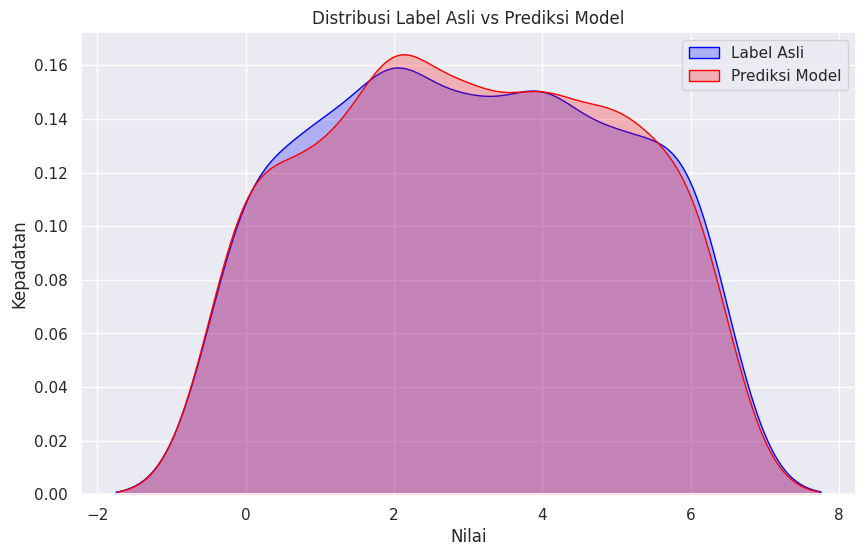

In [162]:
import seaborn as sns

# Misalkan y_test adalah label asli dan y_pred adalah prediksi model
plt.figure(figsize=(10,6))

# KDE plot untuk label asli
sns.kdeplot(y_test, shade=True, label='Label Asli', color='blue')

# KDE plot untuk prediksi model
sns.kdeplot(y_pred, shade=True, label='Prediksi Model', color='red')

plt.title('Distribusi Label Asli vs Prediksi Model')
plt.xlabel('Nilai')
plt.ylabel('Kepadatan')
plt.legend()
plt.show()

Visualisasi ini membandingkan distribusi label asli (Label Asli) dengan prediksi model (Prediksi Model) menggunakan grafik kepadatan, di mana sumbu X menunjukkan nilai dan sumbu Y menunjukkan kepadatan probabilitas. Tujuannya adalah untuk mengevaluasi seberapa baik prediksi model mendekati distribusi data aktual. Jika kedua distribusi tumpang tindih atau sangat mirip, ini menunjukkan bahwa model memiliki performa yang baik dalam memprediksi nilai-nilai yang mendekati data sebenarnya. Namun, jika terdapat perbedaan signifikan, ini mungkin mengindikasikan bahwa model perlu dioptimalkan lebih lanjut. Visualisasi ini berguna untuk analisis diagnostik dan validasi model, memberikan gambaran visual yang jelas tentang akurasi prediksi model.

### **Kesimpulan Akhir**  

Pada proyek ini, saya membangun model **Random Forest** untuk mengklasifikasikan tingkat obesitas berdasarkan berbagai fitur gaya hidup dan demografi. Evaluasi menunjukkan bahwa model memiliki **akurasi tinggi sebesar 94.5%**, dengan nilai precision, recall, dan f1-score yang seimbang di hampir semua kelas.  

Dari analisis data, ditemukan bahwa **konsumsi makanan tinggi kalori berkontribusi signifikan terhadap obesitas**, sementara konsumsi sayuran tidak secara langsung berkorelasi dengan penurunan obesitas. Selain itu, **jenis transportasi juga berpengaruh**, di mana pengguna kendaraan pribadi cenderung memiliki tingkat obesitas lebih tinggi dibandingkan mereka yang berjalan kaki atau menggunakan transportasi umum.  

**Outlier dalam dataset sebagian besar dipertahankan** karena penghapusannya berisiko menghilangkan hingga **33% data**, yang dapat mengurangi akurasi model. Sebagai gantinya, pendekatan transformasi dan analisis lebih lanjut digunakan untuk menangani nilai ekstrem.  

Secara keseluruhan, model ini memberikan hasil yang sangat baik dan dapat digunakan sebagai dasar untuk memahami faktor-faktor yang berkontribusi terhadap obesitas, serta membantu dalam perencanaan intervensi kesehatan berbasis data. 🚀

#### *Project by:*
#### **Dian Pandu Syahfitra - Informatika, [Universitas Brawijaya]**
#### **Powered by Digital Skill Fair 35.0 - Data Science by dibimbing.id**
#### **Obesity Prediction | Random Forest Algorithm**